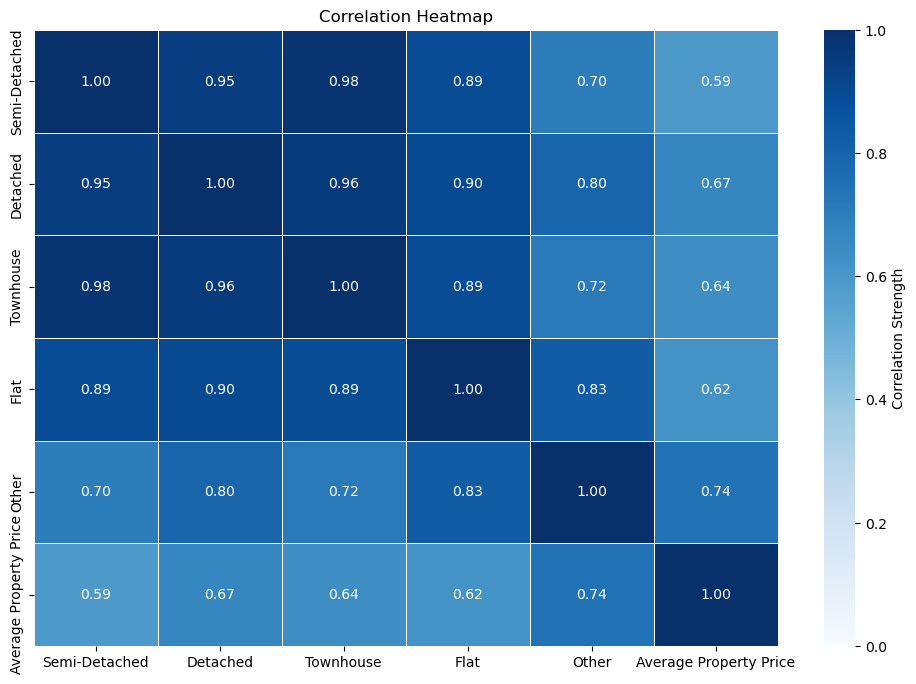

Other            0.744790
Detached         0.671693
Townhouse        0.637281
Flat             0.618801
Semi-Detached    0.591655
dtype: float64
R² score: 0.18598735731193272
RMSE: 260868.13456639298

Regression equation with all 14 explanatory variables:
 Average Property Price = 711862.14 + (-571.28 * Semi-Detached) + (197.18 * Detached) + (254.24 * Townhouse) + (-18.51 * Flat) + (479.30 * Other)


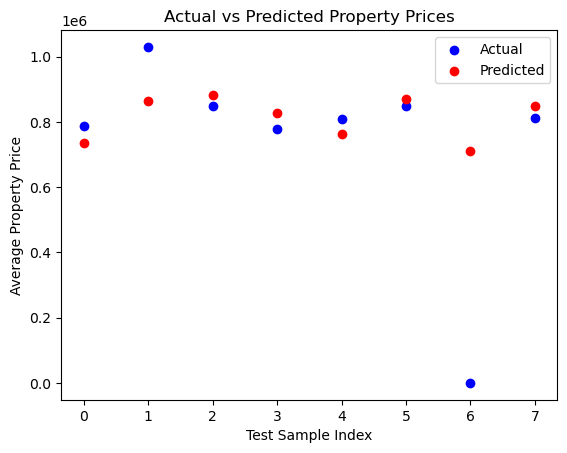

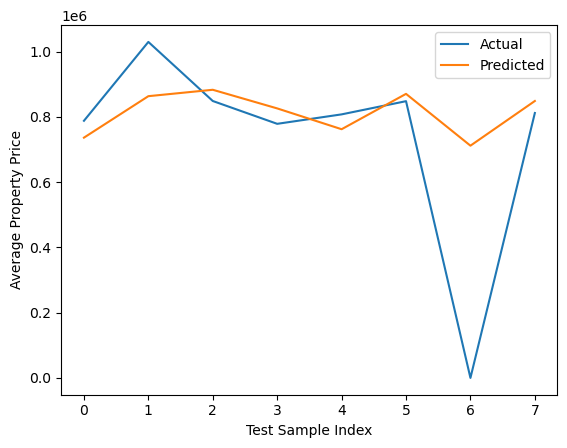

In [71]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load CSV
df = pd.read_csv("/Users/EthanMcElhone/Downloads/Average Property Price vs Property Type - Sheet1.csv", header=None)

# Assign column names and strip whitespace
df.columns = [
    "Months",
    "Average Property Price",
    "Semi-Detached",
    "Detached",
    "Townhouse",
    "Flat",
    "Other"
]
df.columns = df.columns.str.strip()

# List of type columns
type_cols = [col.strip() for col in df.columns[2:]]

# Convert type columns and target to numeric
df[type_cols] = df[type_cols].apply(pd.to_numeric, errors='coerce').fillna(0)
df["Average Property Price"] = pd.to_numeric(df["Average Property Price"], errors='coerce').fillna(0)

# Compute correlation matrix
corr_matrix = df[type_cols + ["Average Property Price"]].corr()

# Heatmap of correlations
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="Blues", vmin=0, vmax=1, linewidths=0.5, cbar_kws={'label': 'Correlation Strength'})
plt.title("Correlation Heatmap")
plt.show()

corrs = df[type_cols].corrwith(df["Average Property Price"])
print(corrs.sort_values(ascending=False))

# Features (X) and target (y)
X = df[type_cols]
y = df["Average Property Price"]

# Train-test split with shuffling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=5)

# Fit linear regression
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("R² score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

# Regression equation
intercept = model.intercept_
coefficients = model.coef_

equation = f"Average Property Price = {intercept:.2f}"
for col, coef in zip(type_cols, coefficients):
    equation += f" + ({coef:.2f} * {col})"
print("\nRegression equation with all 14 explanatory variables:\n", equation)

# Optional: plot predicted vs actual
plt.scatter(range(len(y_test)), y_test, label="Actual", color='blue')
plt.scatter(range(len(y_pred)), y_pred, label="Predicted", color='red')
plt.xlabel("Test Sample Index")
plt.ylabel("Average Property Price")
plt.legend()
plt.title("Actual vs Predicted Property Prices")
plt.show()

# Optional: plot predictions vs actual
plt.plot(range(len(y_test)), y_test, label="Actual")
plt.plot(range(len(y_pred)), y_pred, label="Predicted")
plt.xlabel("Test Sample Index")
plt.ylabel("Average Property Price")
plt.legend()
plt.show()

In-sample R²: 0.6275446893556105
In-sample RMSE: 90519.05371723529

Linear regression equation (all data, in-sample):
 Average Property Price = 309925.29 + (-492.99 * Semi-Detached) + (138.86 * Detached) + (360.13 * Townhouse) + (-43.05 * Flat) + (923.05 * Other)


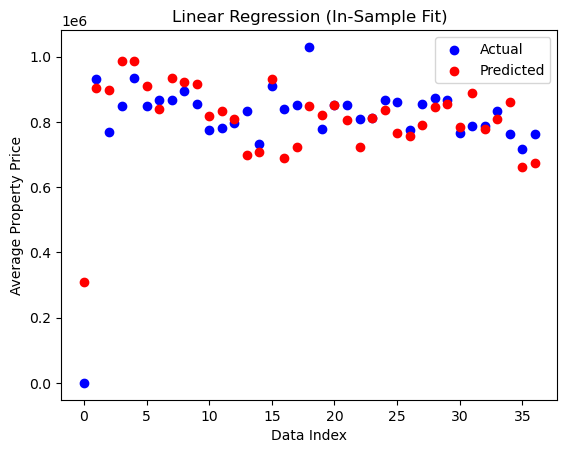

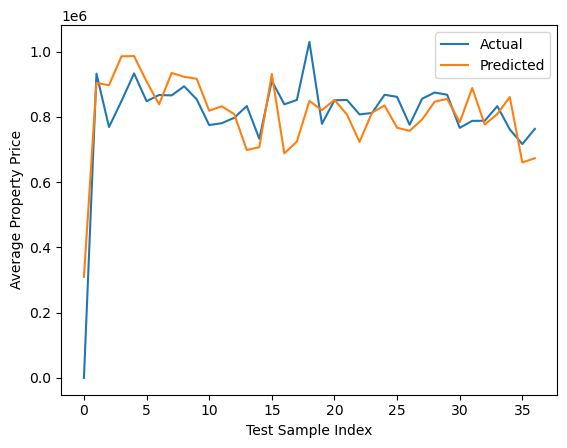

In [25]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

# Load CSV
df = pd.read_csv("/Users/EthanMcElhone/Downloads/Average Property Price vs Property Type - Sheet1.csv", header=None)

# Assign column names and strip whitespace
df.columns = [
    "Months",
    "Average Property Price",
    "Semi-Detached",
    "Detached",
    "Townhouse",
    "Flat",
    "Other"
]
df.columns = df.columns.str.strip()

# List of explanatory variables
type_cols = df.columns[2:]

# Convert type columns and target to numeric
df[type_cols] = df[type_cols].apply(pd.to_numeric, errors='coerce').fillna(0)
df["Average Property Price"] = pd.to_numeric(df["Average Property Price"], errors='coerce').fillna(0)

# Features (X) and target (y)
X = df[type_cols]
y = df["Average Property Price"]

# Fit linear regression on all data
model = LinearRegression()
model.fit(X, y)

# Predict on the same data (in-sample)
y_pred = model.predict(X)

# In-sample evaluation
r2_in_sample = r2_score(y, y_pred)
rmse_in_sample = np.sqrt(mean_squared_error(y, y_pred))
print("In-sample R²:", r2_in_sample)
print("In-sample RMSE:", rmse_in_sample)

# Regression equation
intercept = model.intercept_
coefficients = model.coef_

equation = f"Average Property Price = {intercept:.2f}"
for col, coef in zip(type_cols, coefficients):
    equation += f" + ({coef:.2f} * {col})"
print("\nLinear regression equation (all data, in-sample):\n", equation)

# Optional: plot predicted vs actual
plt.scatter(range(len(y)), y, label="Actual", color='blue')
plt.scatter(range(len(y_pred)), y_pred, label="Predicted", color='red')
plt.xlabel("Data Index")
plt.ylabel("Average Property Price")
plt.legend()
plt.title("Linear Regression (In-Sample Fit)")
plt.show()

# Optional: plot predictions vs actual
plt.plot(range(len(y)), y, label="Actual")
plt.plot(range(len(y_pred)), y_pred, label="Predicted")
plt.xlabel("Test Sample Index")
plt.ylabel("Average Property Price")
plt.legend()
plt.show()